In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv(r'C:\Users\Administrator\Datas\门店数据\曝光-1-5相关性\1-4.csv',encoding= 'gbk')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   开始日期             453 non-null    int64  
 1   结束日期             453 non-null    int64  
 2   商家ID             453 non-null    int64  
 3   商家名称             453 non-null    object 
 4   运营组              453 non-null    object 
 5   省份               453 non-null    object 
 6   城市               453 non-null    object 
 7   是否新增商家           453 non-null    object 
 8   首次上线日期           453 non-null    int64  
 9   门店在线状态           453 non-null    object 
 10  （日均）预设营业时长（h）    453 non-null    float64
 11  （日均）在线营业时长（h）    453 non-null    float64
 12  曝光人数             453 non-null    int64  
 13  入店人数             453 non-null    int64  
 14  下单人数             453 non-null    int64  
 15  下单新客人数           453 non-null    int64  
 16  入店转化率            453 non-null    float64
 17  下单转化率           

In [3]:
data_manjian = data[['开始日期','商家ID','原价交易额','实付交易额','有效订单数','商家补贴金额']]

In [4]:
data_manjian['平均原价'] = data_manjian['原价交易额']/data_manjian['有效订单数']

e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
data_manjian['平均实付'] = data_manjian['实付交易额']/data_manjian['有效订单数']

e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
data_manjian

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付
0,20200401,642989,1062.0,387.0,6,753.0,177.000000,64.500000
1,20200401,653643,0.0,0.0,0,0.0,NaN,NaN
2,20200401,714142,5140.0,2821.0,21,3081.0,244.761905,134.333333
3,20200401,772683,1305.0,688.0,5,693.0,261.000000,137.600000
4,20200401,783170,0.0,0.0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
448,20200401,8983876,1791.0,1205.0,8,898.0,223.875000,150.625000
449,20200401,8983877,1106.0,710.0,2,474.0,553.000000,355.000000
450,20200401,8983878,0.0,0.0,0,0.0,NaN,NaN
451,20200401,8985806,0.0,0.0,0,0.0,NaN,NaN


In [7]:
data_manjian['转化率'] = data_manjian['平均实付']/data_manjian['平均原价']

e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
data_manjian = data_manjian.fillna(0)

In [9]:
data_manjian

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付,转化率
0,20200401,642989,1062.0,387.0,6,753.0,177.000000,64.500000,0.364407
1,20200401,653643,0.0,0.0,0,0.0,0.000000,0.000000,0.000000
2,20200401,714142,5140.0,2821.0,21,3081.0,244.761905,134.333333,0.548833
3,20200401,772683,1305.0,688.0,5,693.0,261.000000,137.600000,0.527203
4,20200401,783170,0.0,0.0,0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
448,20200401,8983876,1791.0,1205.0,8,898.0,223.875000,150.625000,0.672808
449,20200401,8983877,1106.0,710.0,2,474.0,553.000000,355.000000,0.641953
450,20200401,8983878,0.0,0.0,0,0.0,0.000000,0.000000,0.000000
451,20200401,8985806,0.0,0.0,0,0.0,0.000000,0.000000,0.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\b

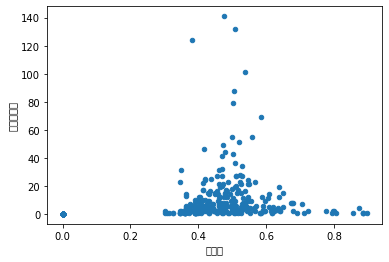

In [11]:
data_manjian.plot.scatter(x='转化率', y='有效订单数')

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backe

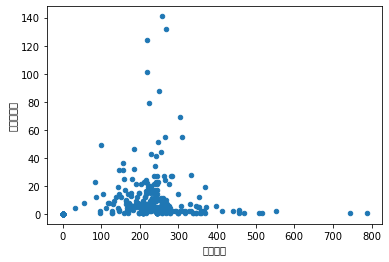

In [12]:
data_manjian.plot.scatter(x='平均原价', y='有效订单数')

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0, flags=flags)


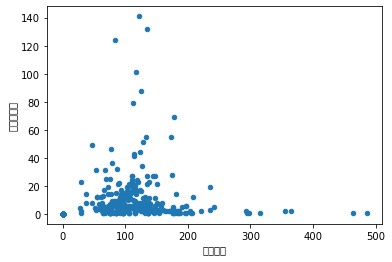

In [13]:
data_manjian.plot.scatter(x='平均实付', y='有效订单数')

In [14]:
data_manjian_helf = data_manjian[data_manjian['转化率']<= 0.4]
data_manjian_helf = data_manjian_helf.sort_values('转化率',ascending = False)
data_manjian_helf

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付,转化率
387,20200401,8755681,745.0,298.0,1,447.0,745.000000,298.000000,0.400000
267,20200401,7994663,453.0,181.0,2,350.0,226.500000,90.500000,0.399558
355,20200401,8471427,980.0,391.0,4,735.0,245.000000,97.750000,0.398980
228,20200401,7622475,586.0,232.0,2,432.0,293.000000,116.000000,0.395904
43,20200401,4304946,2179.0,860.9,9,1630.0,242.111111,95.655556,0.395089
...,...,...,...,...,...,...,...,...,...
209,20200401,7514883,0.0,0.0,0,0.0,0.000000,0.000000,0.000000
213,20200401,7514888,0.0,0.0,0,0.0,0.000000,0.000000,0.000000
214,20200401,7514889,0.0,0.0,0,0.0,0.000000,0.000000,0.000000
224,20200401,7545490,0.0,0.0,0,0.0,0.000000,0.000000,0.000000


In [15]:
data_manjian_helf_drop =data_manjian_helf.drop(data_manjian_helf[data_manjian_helf.原价交易额 < 1].index)

In [16]:
data_manjian_helf_drop = data_manjian_helf_drop.sort_values('有效订单数',ascending = False)

In [17]:
data_manjian_helf_drop

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付,转化率
161,20200401,7207851,27231.0,10420.5,124,21349.0,219.604839,84.036290,0.382670
251,20200401,7743133,4816.0,1679.9,31,3555.0,155.354839,54.190323,0.348816
130,20200401,6968235,1949.5,676.5,23,1502.0,84.760870,29.413043,0.347012
48,20200401,4464626,1458.9,532.9,14,1023.0,104.207143,38.064286,0.365275
159,20200401,7207848,2305.0,840.0,13,1543.0,177.307692,64.615385,0.364425
165,20200401,7264476,2297.0,899.9,10,1787.0,229.700000,89.990000,0.391772
43,20200401,4304946,2179.0,860.9,9,1630.0,242.111111,95.655556,0.395089
117,20200401,6826712,969.0,378.0,8,669.0,121.125000,47.250000,0.390093
351,20200401,8471194,1413.0,532.0,7,1151.0,201.857143,76.000000,0.376504
398,20200401,8803711,1141.0,435.0,6,901.0,190.166667,72.500000,0.381245
